<a id="TOP"></a>
# Workflow Demo

TBA
    
---
    
- Step 0: [Import Packages](#import_packages)
- Step 1: [Define the class to fill particle information in to NumpyArray](#define_class) 
- Step 2: [Define Functions](#define_function) 
- Step 3: [Define Function for `Event_List`](#event_list)  
- Step 4: [Import ROOT File](#import_file)
- Step 5: [logging.info the Branch in the Delphes](#delphes_tree)  
- Step 6: [Loading Event](#loading_event)
- Step 7: [Let's do Jet Clustering!!](#jet_clustering)
- Step 8: [Quick Check Jet Images](#jet_images)
- Step 9: [Quick Check Kinematics of Higgs candidates](#kinematics)




- Step 10: [Print Jets in the Nth event](#jets_in_nth_event)
- Step 11: [Print the Truth Record in an Event](#truth_record)

- Step 12: [High Level Features](#high_level_features)


---

[![arXiv](https://img.shields.io/badge/arXiv-1807.10768%20-green.svg)](https://arxiv.org/abs/1807.10768)   

[![arXiv](https://img.shields.io/badge/arXiv-2009.05930%20-green.svg)](https://arxiv.org/abs/2009.05930) 

Ref: [Boosting $H\to b\bar b$ with Machine Learning](https://arxiv.org/abs/1807.10768) 

Ref: [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)  

Ref: [pyjet](https://github.com/scikit-hep/pyjet)   
    
---   
[Go to NBViewer](https://nbviewer.jupyter.org/github/alan200276/Universality_Boosetd_Higgs/blob/main/Notebook/workflow_demo.ipynb)

<a id="import_packages"></a>
## Import Packages
    
[Back to the top](#TOP)

In [109]:
import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time
import re 
import glob
from tqdm import tqdm

import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

from BranchClass import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

logging.info("Numpy Version: {}".format(np.__version__))
logging.info("Pnadas Version: {}".format(pd.__version__))
logging.info("uproot Version: {}".format(uproot.__version__))
logging.info("pyjet Version: {}".format(pyjet.__version__))

%config InlineBackend. figure_format = 'retina'

INFO:root:Numpy Version: 1.18.5
INFO:root:Pnadas Version: 1.1.4
INFO:root:uproot Version: 3.13.0
INFO:root:pyjet Version: 1.7.0


<a id="define_class"></a>
## Define the class to fill particle information in to NumpyArray     

    
 User can use 
```
GenParticles = BrachGenParticles(file)
PID_all = GenParticles.PID
```
to get all GenParticles PID array
or
```
GenParticles = BrachGenParticles(file)
PID = GenParticles.PID_At(i)
```
to get the GenParticles PID array in the ith event
    
More function can be found in `BranchClass.py`. 
    
[Back to the top](#TOP)

<a id="define_function"></a>
## Define Functions 

[Back to the top](#TOP)

In [ ]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)

def Mbbbb(j1,j2,j3,j4):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    pt3, eta3, phi3, m3 = j3.pt,j3.eta,j3.phi,j3.mass
    pt4, eta4, phi4, m4 = j4.pt,j4.eta,j4.phi,j4.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px3, py3, pz3 = pt3*np.cos(phi3), pt3*np.sin(phi3), np.sqrt(m3**2+pt3**2)*np.sinh(eta3)
    e3 = np.sqrt(m3**2 + px3**2 + py3**2 + pz3**2)
    px4, py4, pz4 = pt4*np.cos(phi4), pt4*np.sin(phi4), np.sqrt(m4**2+pt4**2)*np.sinh(eta4)
    e4 = np.sqrt(m4**2 + px4**2 + py4**2 + pz4**2)
    
    return np.sqrt((e1+e2+e3+e4)**2-(px1+px2+px3+px4)**2-(py1+py2+py3+py4)**2-(pz1+pz2+pz3+pz4)**2)

def MJJ(j1,j2):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)


def MT(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2,missingET,missingETA,missingPHI):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px_missing, py_missing = missingET*np.cos(missingPHI), missingET*np.sin(missingPHI)
    
    EllT = np.sqrt((px1+px2)**2 + (py1+py2)**2 +  M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2)**2 )

    MT = np.sqrt( (EllT+missingET)**2 - (px1+px2+px_missing)**2 - (py1+py2+py_missing)**2 )
    
    return MT
    
def PxPyPzE(pt,eta,phi,m):
    px, py, pz = pt*np.cos(phi), pt*np.sin(phi), np.sqrt(m**2+pt**2)*np.sinh(eta)
    e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    
    return px, py, pz, e    

def PtEtaPhiM(px, py, pz, e):
    E, px ,py, pz = e, px, py, pz  
    P = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    eta = 1./2.*np.log((P + pz)/(P - pz))
    phi = np.arctan(py/px)
    m = np.sqrt(np.sqrt((E**2 - px**2 - py**2 - pz**2)**2))

    return pt, eta, phi, m

def ET(jet):
    pt = jet.pt
    m = jet.mass
    ET = np.sqrt(m**2 + pt**2)
    return  ET


def XHH(jet1, jet2):
    m1, m2 = jet1.mass, jet2.mass
    XHH = np.sqrt( (m1-124)**2/(0.1*m1) + (m2-115)**2/(0.1*m2))
    return  XHH

def DeltaR(eta1,phi1, eta2,phi2):
    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def FourVectorbb(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    m = np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    pt = np.sqrt((px1+px2)**2 + (py1+py2)**2)
    eta = np.arcsinh((pz1+pz2)/np.sqrt(m**2+pt**2))
    phi = np.arcsin((py1+py2)/pt)
    
    return pt, eta, phi, m


def jet_trim(jet0, pt_cut= 0.05, R1 = 0.2):
    # Define a cut threshold that the subjets have to meet (i.e. 3% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
    subjet_array = subjets.inclusive_jets()
    j0 = []
    if (subjet_array[0].pt >= jet0_cut):
        for ij, subjet in enumerate(subjet_array):
            if subjet.pt < jet0_cut:
                # subjet doesn't meet the percentage cut on the original jet pT
                continue
            if subjet.pt >= jet0_cut:
                # Get the subjets pt, eta, phi constituents
                subjet_data = subjet.constituents_array()
                j0.append(subjet_data)
    else:
        j0 = subjet_array[0].constituents_array()*0
    jet = j0[0]
    for i, subjet in enumerate(j0):
        if i==0 :
            continue
        jet = np.append(jet, subjet)
        
    sequence = pyjet.cluster(jet, R=1.0, p=-1)
    jet = sequence.inclusive_jets()
    return jet


def digit(loc,pid):
    #     //  PID digits (base 10) are: n nr nl nq1 nq2 nq3 nj
    #     //   nj = 1, nq3=2 , nq2=3, nq1, nl, nr, n, n8, n9, n10 
    #     //  the location enum provides a convenient index into the PID
    numerator = 10**(loc-1)
    
    return int((abs(pid)/numerator)%10)

def hasBottom(pid):
    # get B hadron
    # PID for B hadron are 5XX, 5XXX
    # https://gitlab.com/hepcedar/rivet/-/blob/release-3-1-x/analyses/pluginCMS/CMS_2015_I1370682.cc#L390
    # https://rivet.hepforge.org/code/2.1.0/a00827.html#ad4c917595339ea52152c2950ce1225e7
    # https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf
    if( digit(2,pid) == 5 or digit(3,pid) == 5 or digit(4,pid) == 5 ):
        return True
    else:
        return False



<a id="event_list"></a>
## Define Function for `Event_List`

[Back to the top](#TOP)

In [249]:
def Event_List(GenParticle, EventWeight):
#     logging.info(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    
    k = 0
    bbbb_list = []
    event_list = []
    bb1_P4, bb2_P4 = [], []
    Mbbbb = []
    bhadron_list = []
    for N in tqdm(range(GenParticle.length)):

        event_list_tmp = []
        
        event_list_tmp.append([GenParticle.PT_At(N),  GenParticle.Eta_At(N), \
                               GenParticle.Phi_At(N), GenParticle.Mass_At(N), \
                               GenParticle.PID_At(N), GenParticle.Status_At(N),\
                               GenParticle.Charge_At(N),\
                               np.full(len(GenParticle.PT_At(N)),0), #for B hadron tag
                               np.full(len(GenParticle.PT_At(N)), EventWeight.Event_Weight_At(N)[0]),
                               GenParticle.M1_At(N), GenParticle.M2_At(N),\
                               GenParticle.D1_At(N), GenParticle.D2_At(N),\
                               
                              ])
        
        event_list_tmp = np.array(event_list_tmp)
    
        """
        Find All B Hadrons
        """
        unstable_hadron = event_list_tmp[0][:,np.abs(event_list_tmp[0][5,:])==2]
        bhadron_index = np.where(np.vectorize(hasBottom)(unstable_hadron[4,:])==True)[0] 
        bhadron = unstable_hadron[:,bhadron_index]
        bhadron_list_tmp = []
        
        """
        Find B Hadrons before decay
        """
        for i in range(len(bhadron[0])):   
            if hasBottom(GenParticle.PID_At(N)[int(bhadron[11][i])]) == False and hasBottom(GenParticle.PID_At(N)[int(bhadron[12][i])]) == False:
                bhadron_list_tmp.append(bhadron[:,i])
        
        """
        Ghost Association Method: create ghost-associated B Hadrons
        """
        Ghostparam = 1E-20
        for i, element in enumerate(bhadron_list_tmp):
            bhadron_list_tmp[i][0] = element[0]*Ghostparam  # PT*Ghostparam
            bhadron_list_tmp[i][3] = element[3]*Ghostparam  # Mass*Ghostparam
            bhadron_list_tmp[i][7] = 1                      #B Hadron tag 
        
        """
        Pick stable final state particel (status = 1) and filter ou neutrinos (|PID| = 12, 14, 16)
        """
        event_list_tmp = event_list_tmp[0][:,event_list_tmp[0][5,:]==1] 
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=12]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=14]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=16]
        
        """
        Ghost Association Method: add ghost-associated B Hadrons
        """
        if len(bhadron_list_tmp) != 0:
            event_list_tmp = np.concatenate((np.array(event_list_tmp).transpose(),bhadron_list_tmp)).transpose()
            
        else:
            event_list_tmp = np.array(event_list_tmp)
        
        event_list.append(event_list_tmp)
        
        
#         k += 1
#         if k == 1000:
#             break
        
    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
    
    return event_list

<a id="import_file"></a>
## Import ROOT File

[Back to the top](#TOP)

In [250]:
%%time

path = "/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features_demo/"


process_path_herwig_angular_H = sorted(glob.glob(path+"ggHj_herwig_ang*.root"))

process_path_pythia_default_H = sorted(glob.glob(path+"ggHj_pythia_def*.root"))



process_path_herwig_angular_QCD = sorted(glob.glob(path+"ppjj_herwig_ang*.root"))


process_path_pythia_default_QCD = sorted(glob.glob(path+"ppjj_pythia_def*.root"))



herwig_angular_H = {"250_500": 0}
pythia_default_H = {"250_500": 0}
for pt_slice in ["450_700","650_900","850_1100"]:
    herwig_angular_H.update({pt_slice: 0}) 
    pythia_default_H.update({pt_slice: 0}) 
    
herwig_angular_QCD = {"250_500": 0}
pythia_default_QCD = {"250_500": 0}
for pt_slice in ["450_700","650_900","850_1100"]:
    herwig_angular_QCD.update({pt_slice: 0}) 
    pythia_default_QCD.update({pt_slice: 0}) 

logging.info("\n")  
for file_path, pt_slice in zip(process_path_herwig_angular_H, herwig_angular_H):

    if os.path.isfile(file_path):
        logging.info(str(file_path) +" exists.")

        herwig_angular_H[pt_slice] = uproot.open(file_path)["Delphes;1"]

    else:
        logging.info("Please Check Input Files!!!")
        raise InputError("Please Check Input Files!!!")
        

logging.info("\n")
for file_path, pt_slice in zip(process_path_herwig_angular_QCD, herwig_angular_QCD):

    if os.path.isfile(file_path):
        logging.info(str(file_path) +" exists.")

        herwig_angular_QCD[pt_slice] = uproot.open(file_path)["Delphes;1"]

    else:
        logging.info("Please Check Input Files!!!")
        raise InputError("Please Check Input Files!!!")
        
        
        
logging.info("\n")        
for file_path, pt_slice in zip(process_path_pythia_default_H, pythia_default_H):

    if os.path.isfile(file_path):
        logging.info(str(file_path) +" exists.")

        pythia_default_H[pt_slice] = uproot.open(file_path)["Delphes;1"]

    else:
        logging.info("Please Check Input Files!!!")
        raise InputError("Please Check Input Files!!!")
        

logging.info("\n")

for file_path, pt_slice in zip(process_path_pythia_default_QCD, pythia_default_QCD):

    if os.path.isfile(file_path):
        logging.info(str(file_path) +" exists.")

        pythia_default_QCD[pt_slice] = uproot.open(file_path)["Delphes;1"]

    else:
        logging.info("Please Check Input Files!!!")
        raise InputError("Please Check Input Files!!!")
        
        
        
        
logging.info("\n")
logging.info("All Files are loaded!")
    


INFO:root:

INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_250_500_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_450_700_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_650_900_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ggHj_herwig_ang_850_1100_1.root exists.
INFO:root:

INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ppjj_herwig_ang_250_500_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ppjj_herwig_ang_450_700_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ppjj_herwig_ang_650_900_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Herwig_angular/ppjj_herwig_ang_850_1100_1.root exists.
INFO:root:

INFO:root:/home/u5/Universality_Boosetd_Higgs/Pythia_default/ggHj_pythia_def_250_500_1.root exists.
INFO:root:/home/u5/Universality_Boosetd_Higgs/Pythia_default/g

CPU times: user 8.9 s, sys: 313 ms, total: 9.21 s
Wall time: 9.19 s


<a id="delphes_tree"></a>
##  logging.info the Branch in the Delphes

[Back to the top](#TOP)

In [251]:
# herwig_angular_H["250_500"].show()

<a id="loading_event"></a>
## Loading Event 

[Back to the top](#TOP)

In [252]:
%%time
def Loading_Event(ROOT_dictionary = []):

    Event_List_, Event_Weight_ = [], []
    for pt_slice in ROOT_dictionary:
        logging.info("Pt in : " + str(pt_slice))

        GenParticle = BranchGenParticles(ROOT_dictionary[pt_slice])
        Event_Weight_tmp = Event_Weight(ROOT_dictionary[pt_slice])
        Event_List_tmp = Event_List(GenParticle, Event_Weight_tmp)
        

        Event_List_.extend(Event_List_tmp)
        Event_Weight_.extend(Event_Weight_tmp.Event_Weight)
        logging.info("\n")
    
    return Event_List_, Event_Weight_
    

Event_List_herwig_angular_H, Weight_herwig_angular_H = Loading_Event(herwig_angular_H)
Event_List_pythia_default_H, Weight_pythia_default_H = Loading_Event(pythia_default_H)

Event_List_herwig_angular_QCD, Weight_herwig_angular_QCD = Loading_Event(herwig_angular_QCD)
Event_List_pythia_default_QCD, Weight_pythia_default_QCD = Loading_Event(pythia_default_QCD)


INFO:root:Pt in : 250_500
100%|██████████| 10000/10000 [00:13<00:00, 728.55it/s]
INFO:root:Time Cost : 0.2288 min
INFO:root:

INFO:root:Pt in : 450_700
100%|██████████| 10000/10000 [00:13<00:00, 755.96it/s]
INFO:root:Time Cost : 0.2205 min
INFO:root:

INFO:root:Pt in : 650_900
100%|██████████| 10000/10000 [00:12<00:00, 781.98it/s]
INFO:root:Time Cost : 0.2132 min
INFO:root:

INFO:root:Pt in : 850_1100
100%|██████████| 10000/10000 [00:12<00:00, 771.19it/s]
INFO:root:Time Cost : 0.2162 min
INFO:root:

INFO:root:Pt in : 250_500
100%|██████████| 10000/10000 [00:09<00:00, 1078.77it/s]
INFO:root:Time Cost : 0.1545 min
INFO:root:

INFO:root:Pt in : 450_700
100%|██████████| 10000/10000 [00:09<00:00, 1061.73it/s]
INFO:root:Time Cost : 0.1570 min
INFO:root:

INFO:root:Pt in : 650_900
100%|██████████| 10000/10000 [00:09<00:00, 1041.72it/s]
INFO:root:Time Cost : 0.1600 min
INFO:root:

INFO:root:Pt in : 850_1100
100%|██████████| 10000/10000 [00:09<00:00, 1022.29it/s]
INFO:root:Time Cost : 0.1631 mi

CPU times: user 3min 37s, sys: 5.29 s, total: 3min 43s
Wall time: 3min 42s


<a id="jet_clustering"></a>
## Let's do Jet Clustering!!
### We use ` np.core.records.fromarrays` to assign the name of kinematic variables and PID
### In `pyjet`, the data type are only 
`
np.dtype([('pT', 'f8'), ('eta', 'f8'), ('phi', 'f8'), ('mass', 'f8')])
`
### or (cluster(..., ep=True))
`
np.dtype([('E', 'f8'), ('px', 'f8'), ('py', 'f8'), ('pz', 'f8')])  
`
### In this example, we use `(pt, eta, phi and mass)`.
### After assigning the name for our each event list, the `pyjet.cluster` and `inclusive_jets` will help us do jet clustering.
`
sequence_cluster = pyjet.cluster(to_cluster, R = 1.0,p = -1)
jets_cluster = sequence_cluster.inclusive_jets(pt_min)
`
#### Variable: `R` is the cone size of the jet.
#### Variable: `p` is the jet clustering algorithm. `-1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt`
#### Variable: `pt_min` is the minimum jet's pt.

[Back to the top](#TOP)

In [292]:
%%time

# process_list = {
#                "Event_List_Herwig_angular_H": Event_List_Herwig_angular_H,
#                "Event_List_pythia_angular_QCD": Event_List_pythia_angular_QCD,
#                 }


process_list = [Event_List_herwig_angular_H, Event_List_herwig_angular_QCD, 
                Event_List_pythia_default_H, Event_List_pythia_default_QCD
               ]




process_list_clustered = []
double_b_tag, Higgs_candidate = [], []
raw_weight = []

for i in range(len(process_list)):
    process_list_clustered.append([])
    Higgs_candidate.append([])
    double_b_tag.append([])
    raw_weight.append([])
    
    
ticks_1 = time.time()


for N, process in enumerate(process_list):
    counter = 0
    
    for i in tqdm(range(len(process))):

        """
        Jet clustering 
        Fat jet: R = 1
        Anti-kt
        """
        to_cluster = np.core.records.fromarrays(process[i][:9], 
                                                names="pt, eta, phi, mass, PID, Status, Charge, B_tag, weight",
                                                formats = "f8, f8, f8, f8, f8, f8, f8, f8, f8"
                                               )
        pt_min = 25
        sequence_cluster = pyjet.cluster(to_cluster, R = 1, p = -1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
        jets_cluster = sequence_cluster.inclusive_jets(pt_min)
        process_list_clustered[N].append(jets_cluster)

        
        """
        Higgs Candidate: have one double-$b$ tagged jet associated with $H$ candidate
        """
        Higgs_candidate_tmp = []
        if len(jets_cluster) >=1:
            for jet in jets_cluster:
                B_tag = 0
                for constituent in jet:
                    if constituent.B_tag == 1:
                        B_tag += 1
                if B_tag >= 2:
                    Higgs_candidate_tmp.append(jet)
                
        if len(Higgs_candidate_tmp) >= 1:
            Higgs_candidate[N].append(Higgs_candidate_tmp[0])
            double_b_tag[N].append(1)
            for constituent in Higgs_candidate_tmp[0]:
                raw_weight[N].append(constituent.weight)
                break

        else:
            double_b_tag[N].append(0)
                
  
        
#         counter += 1 
#         if counter == 10000:
#             break


ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))

100%|██████████| 40000/40000 [06:51<00:00, 97.12it/s] 
INFO:root:Time Cost : 29.3480 min


CPU times: user 29min 10s, sys: 26.5 s, total: 29min 37s
Wall time: 29min 23s


In [293]:
%%time

for i in range(len(process_list)):
    if i % 2 == 0:
        logging.info("H signal")
    elif i % 2 == 1:
        logging.info("QCD bkg")

    logging.info("There are {} events (process_list_clustered).".format(len(process_list_clustered[i])))
    logging.info("There are {} events (Higgs Candidate).".format(len(Higgs_candidate[i])))
    logging.info("\n")

INFO:root:H signal
INFO:root:There are 40000 events (process_list_clustered).
INFO:root:There are 35168 events (Higgs Candidate).
INFO:root:

INFO:root:QCD bkg
INFO:root:There are 40000 events (process_list_clustered).
INFO:root:There are 3025 events (Higgs Candidate).
INFO:root:

INFO:root:H signal
INFO:root:There are 40000 events (process_list_clustered).
INFO:root:There are 35523 events (Higgs Candidate).
INFO:root:

INFO:root:QCD bkg
INFO:root:There are 40000 events (process_list_clustered).
INFO:root:There are 3769 events (Higgs Candidate).
INFO:root:



CPU times: user 19.1 ms, sys: 4.15 ms, total: 23.2 ms
Wall time: 19 ms


<a id="jet_images"></a>
# Quick Check Jet Images

[Back to the top](#TOP)

In [298]:
def dphi(phi,phi_c):

    dphi_temp = phi - phi_c
    while dphi_temp > np.pi:
        dphi_temp = dphi_temp - 2*np.pi
    while dphi_temp < -np.pi:
        dphi_temp = dphi_temp + 2*np.pi
    return (dphi_temp)


###################################################################################
logging.info("Make Leading Jet Images")
logging.info("\n")    
logging.info(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
time.sleep(1)
ticks_1 = time.time()

jetimage_list = []

image_source = Higgs_candidate[2]

for N in tqdm(range(len(image_source))):
    
    if len(image_source[N]) < 1: # at least one jet in this event.
        continue 
        

    
    jet = image_source[N] #leading jet's information
    

    width,height = 40,40
    image_0 = np.zeros((width,height)) #Charged pt 
    image_1 = np.zeros((width,height)) #Neutral pt
    image_2 = np.zeros((width,height)) #Charged multiplicity
    isReflection = 1
    x_hat = np.array([1,0]) 
    y_hat = np.array([0,1])
    
    subjets = pyjet.cluster(jet.constituents_array(), R=0.2, p=-1)
    subjet_array = subjets.inclusive_jets()
    
        
    if len(subjet_array) > 1:
            #First, let's find the direction of the second-hardest jet relative to the first-hardest jet
#             phi_dir = -(dphi(subjet_array[1].phi,subjet_array[0].phi))
#             eta_dir = -(subjet_array[1].eta - subjet_array[0].eta)
            phi_dir = -(dphi(subjet_array[1].phi,jet.phi))
            eta_dir = -(subjet_array[1].eta - jet.eta)
            #Norm difference:
            norm_dir = np.linalg.norm([phi_dir,eta_dir])
            #This is now the y-hat direction. so we can actually find the unit vector:
            y_hat = np.divide([phi_dir,eta_dir],np.linalg.norm([phi_dir,eta_dir]))
            #and we can find the x_hat direction as well
            x_hat = np.array([y_hat[1],-y_hat[0]]) 
    
    if len(subjet_array) > 2:
#         phi_dir_3 = -(dphi(subjet_array[2].phi,subjet_array[0].phi))
#         eta_dir_3 = -(subjet_array[2].eta - subjet_array[0].eta)
        phi_dir_3 = -(dphi(subjet_array[2].phi,jet.phi))
        eta_dir_3 = -(subjet_array[2].eta - jet.eta)

        isReflection = np.cross(np.array([phi_dir,eta_dir,0]),np.array([phi_dir_3,eta_dir_3,0]))[2]
        

    R = 1.0
    for constituent in jet:
        
#         new_coord = [dphi(constituent.phi,jet.phi),constituent.eta-jet.eta]
#         indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2, math.floor(height*(new_coord[1])/(R*1.5))+height//2]


        if (len(subjet_array) == 1):
            #In the case that the reclustering only found one hard jet (that seems kind of bad, but hey)
            #no_two = no_two+1
#             new_coord = [dphi(constituent.phi,subjet_array[0].phi),constituent.eta-subjet_array[0].eta]
            new_coord = [dphi(constituent.phi, jet.phi),constituent.eta-jet.eta]
            logging.info(constituent.eta, jet.eta)
            logging.info(new_coord)
            indxs = [math.floor(width*new_coord[0]/(R*1))+width//2, math.floor(height*(new_coord[1])/(R*1))+height//2]
            
        else:
            #Now, we want to express an incoming particle in this new basis:
#             part_coord = [dphi(constituent.phi,subjet_array[0].phi),constituent.eta-subjet_array[0].eta]
            part_coord = [dphi(constituent.phi,jet.phi),constituent.eta-jet.eta]
            new_coord = np.dot(np.array([x_hat,y_hat]),part_coord)
            
            #put third-leading subjet on the right-hand side
            if isReflection < 0: 
                new_coord = [-new_coord[0],new_coord[1]]
            elif isReflection > 0:
                new_coord = [new_coord[0],new_coord[1]]
            #Now, we want to cast these new coordinates into our array
            #(row,column)
#             indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2,math.floor(height*(new_coord[1]+norm_dir/1.5)/(R*1.5))+height//2]
#             indxs = [math.floor(width*new_coord[0]/(R*1.5))+width//2,math.floor(height*new_coord[1]/(R*1.5))+height//2] #(phi,eta) and the leading subjet at the origin
#             indxs = [math.floor(height*new_coord[1]/(R*1.5))+height//2,math.floor(width*new_coord[0]/(R*1.5))+width//2] #(eta,phi) and the leading subjet at the origin
            indxs = [math.floor(height*new_coord[1]/(R*1))+height//2,math.floor(width*new_coord[0]/(R*1))+width//2] #(eta,phi) and the leading subjet at the origin

        if indxs[0] >= width or indxs[1] >= height or indxs[0] <= 0 or indxs[1] <= 0:
            continue
            
        phi_index = int(indxs[0]); eta_index = int(indxs[1])

        #finally, let's fill
        if constituent.Charge != 0:
            image_0[phi_index,eta_index] = image_0[phi_index,eta_index] + constituent.pt
            image_2[phi_index,eta_index] = image_2[phi_index,eta_index] + 1

        elif constituent.Charge == 0:
            image_1[phi_index,eta_index] = image_1[phi_index,eta_index] + constituent.pt

            
    image_0 = np.divide(image_0,np.sum(image_0)) #Charged pt 
    image_1 = np.divide(image_1,np.sum(image_1)) #Neutral pt 
    image_2 = np.divide(image_2,np.sum(image_2)) #Charged multiplicity
    jetimage_list.append(np.array([image_0,image_1,image_2]))
    
    
jetimage_list = np.array(jetimage_list)


logging.info("There are {} jet images.".format(len(jetimage_list)))

# np.savez(imagespath +str(PRO)+"_"+str(GEN)+"_"+str(SHO)+"_"+str(file_number)+"_untrimmed.npz", jetimage_list)

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
logging.info("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))





INFO:root:Make Leading Jet Images
INFO:root:

INFO:root:Thu Aug 19 23:22:08 2021
100%|██████████| 35523/35523 [00:54<00:00, 654.18it/s]
INFO:root:There are 35523 jet images.
INFO:root:Time Cost : 0.9162 min


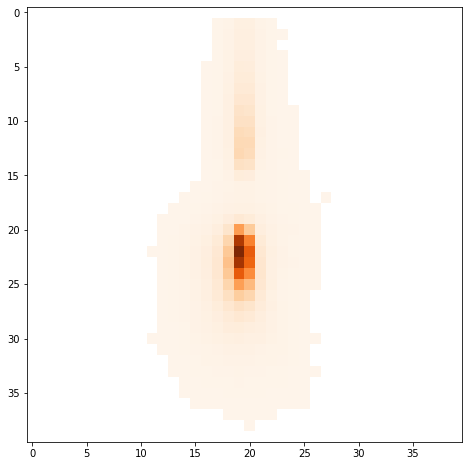

In [299]:
Oranges = cm.get_cmap('Oranges_r', 256)
newcolors = Oranges(np.linspace(1, 0, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[:1, :] = white
newcmap = ListedColormap(newcolors, name='OrangeWhite')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))


plt.imshow(np.average(jetimage_list[:,0], axis=0),vmin=0, 
#                            vmax=round(np.max(jetimage_average),3),
#                           vmax=0.5,
                          cmap=newcmap, 
                           origin='upper')

plt.show()

<a id="kinematics"></a>
# Quick Check Kinematics of Higgs candidates


[Back to the top](#TOP)

In [301]:
%%time

M_h = []
PT_h = []
weight = []

for i in range(len(Higgs_candidate)):
    M_h.append([])
    PT_h.append([])
    weight.append([])
    
for N, process in enumerate(Higgs_candidate):
# for N, process in enumerate(process_list_clustered):
    for i, element in tqdm(enumerate(process)):
        if len(element) < 1:
            continue
        M_h[N].append(element.mass)
        PT_h[N].append(element.pt)
        weight[N].append(raw_weight[N][i])
        
    if N % 2 == 0:
        proc = "H signal"
    elif N % 2 == 1:
        proc = "QCD bkg"

    logging.info("Process: {}, # of events:{}".format(proc,len(PT_h[N])))
    logging.info("\n")
    

35168it [00:00, 297740.85it/s]
INFO:root:Process: H signal, # of events:35168
INFO:root:

3025it [00:00, 267352.96it/s]
INFO:root:Process: QCD bkg, # of events:3025
INFO:root:

35523it [00:00, 343161.63it/s]
INFO:root:Process: H signal, # of events:35523
INFO:root:

3769it [00:00, 212872.42it/s]
INFO:root:Process: QCD bkg, # of events:3769
INFO:root:



CPU times: user 224 ms, sys: 56.3 ms, total: 281 ms
Wall time: 273 ms


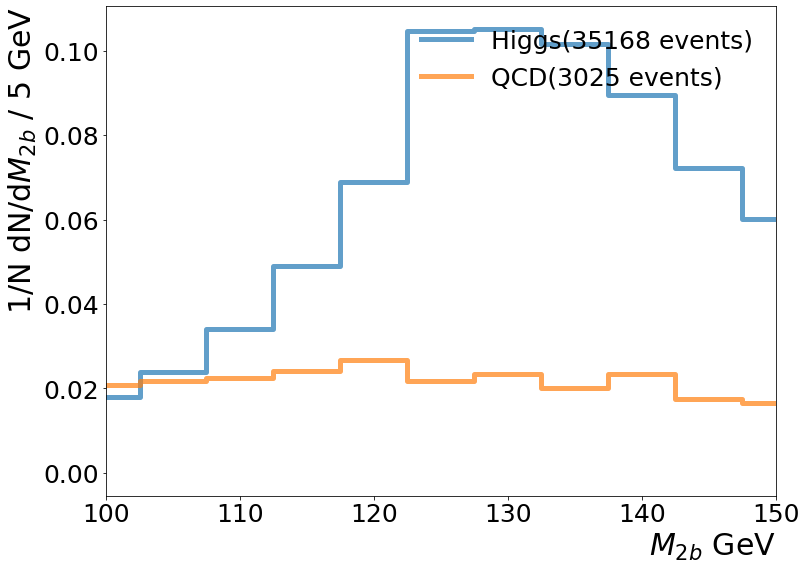

CPU times: user 1.1 s, sys: 245 ms, total: 1.34 s
Wall time: 1.34 s


In [402]:
%%time

fig, ax = plt.subplots(1,1, figsize=(12,9))
length = np.linspace(0,2000,401)


index = 0

hist, bins = np.histogram(M_h[index], bins=length, weights=weight[index])
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
#          hist.astype(np.float32) ,
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="Higgs({} events)".format(len(M_h[0])))

index = 1

hist, bins = np.histogram(M_h[index], bins=length, weights=weight[index])
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
#          hist.astype(np.float32),
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="QCD({} events)".format(len(M_h[1])))

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlim((100,150))
plt.xlabel("$M_{2b}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.legend(loc="upper right",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
# plt.ylim((0., 0.18))
# plt.yscale("log")
plt.ylabel("1/N dN/d$M_{2b}$ / 5 GeV", fontsize=30, horizontalalignment='right',y=1)
plt.show() 

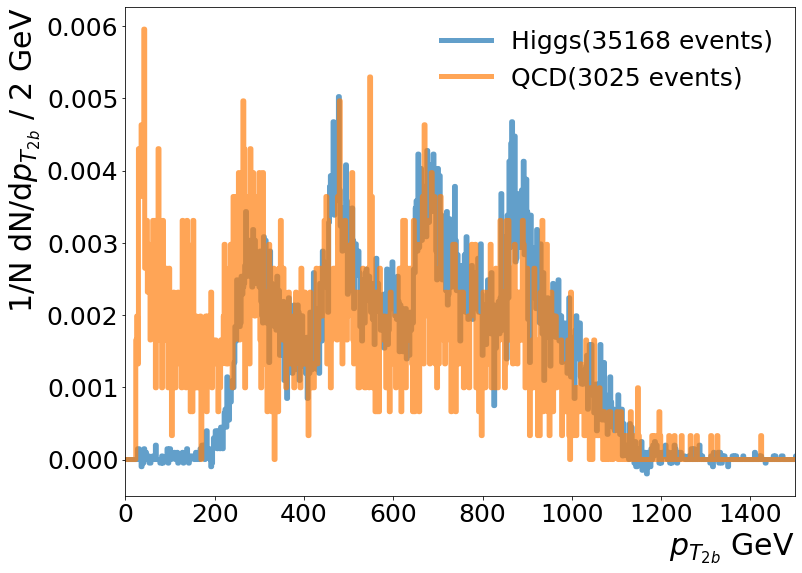

CPU times: user 244 ms, sys: 20 ms, total: 264 ms
Wall time: 259 ms


In [403]:
%%time

fig, ax = plt.subplots(1,1, figsize=(12,9))
length = np.linspace(0,2000,1001)

index = 0

hist, bins = np.histogram(PT_h[index], bins=length, weights=weight[index])
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
#          hist.astype(np.float32) ,
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="Higgs({} events)".format(len(PT_h[0])))

index = 1

hist, bins = np.histogram(PT_h[index], bins=length, weights=weight[index])
plt.step(bins[:-1], 
         hist.astype(np.float32) / hist.sum() ,
#          hist.astype(np.float32) ,
         where='mid',
         linewidth=5, 
         alpha=0.7,
         label="QCD({} events)".format(len(PT_h[1])))

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
plt.xlim((0,1500))
plt.xlabel("$p_{T_{2b}}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.legend(loc="upper right",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
# plt.ylim((0., 0.18))
plt.ylabel("1/N dN/d$p_{T_{2b}}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
plt.show() 

<a id="jets_in_nth_event"></a>
## Print Jets in the Nth event

[Back to the top](#TOP)

In [ ]:
index = 0
N = 0

for i, jets in enumerate(process_list_clustered[index][N]):
    print("{}".format("No." +str(i)+" Jet's Information"))
    print(jets)
    print("-------------------------------------------------------------------------")
    print("{:^19} {:^20} ".format("Constituent's PID","Constituent's Four Momentum"))
    print("-------------------------------------------------------------------------")
    
    for constituent in jets: # get constituent in each "jet_element"
        print("{:^19} {} {:^19} ".format(int(constituent.PID), constituent, int(constituent.Charge)))
    print("-------------------------------------------------------------------------")

<a id="truth_record"></a>
## Print the Truth Record in an Event


[Back to the top](#TOP)

In [ ]:
%%time
GenParticle = BranchGenParticles(herwig_angular_H["250_500"])



print("There are {} information in this event.".format(len(GenParticle.Status[0])))
print("GenParticle Information")
print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^8}{:^8}".format("#","Status","PID", "M1", "M2", "D1", "D2", "PT", "Eta","Phi", "Mass"))

index = 4 ## which event you want to logging.info out
k = 0
for j in range(len(GenParticle.Status_At(index))):
    
#     if GenParticle.Status_At(index)[j] == 1: ##Selet the Stable Final State Particles
#         if np.abs(GenParticle.PID_At(index)[j]) == 12 or np.abs(GenParticle.PID_At(index)[j]) == 14:

#     if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 24 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 24:
#         if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 23 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 23:

        print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.2}{:^8.2}{:^8.2}{:^8.2}".format( \
        j, GenParticle.Status_At(index)[j],  GenParticle.PID_At(index)[j], GenParticle.M1_At(index)[j], GenParticle.M2_At(index)[j],
         GenParticle.D1_At(index)[j], GenParticle.D2_At(index)[j],  GenParticle.PT_At(index)[j],  GenParticle.Eta_At(index)[j], GenParticle.Phi_At(index)[j], GenParticle.Mass_At(index)[j]))

#             k +=1
# logging.info(k)

<a id="high_level_features"></a>
## High Level Features

[Back to the top](#TOP)

In [137]:
%%time 
def High_Level_Features(csv_file=[]):
    
    if len(csv_file) < 1:
        raise Inputerror("Please check high-level features files!!")
        
    
    high_level_feature = pd.read_csv(csv_file[0])
    high_level_feature = high_level_feature[(high_level_feature["PTJ_0"] > 300 ) & (high_level_feature["PTJ_0"] <= 480 )]
#     high_level_feature = high_level_feature[(high_level_feature["PTJ_0"] > 300 )]
    logging.info(str(csv_file[0]))
    logging.info("File Length: {}".format(len(high_level_feature)))
    logging.info("Higgs jet Pt min: {:.3f},  Higgs jet Pt max: {:.3f}".format(high_level_feature["PTJ_0"].min(),high_level_feature["PTJ_0"].max()))
    logging.info("\r")
    
    for i, file in enumerate(csv_file):
        if i == 0:
            continue
        else:
            logging.info(str(file))
            
            if "250_500" in str(file):

                dataframe = pd.read_csv(file)
                dataframe = dataframe[(dataframe["PTJ_0"] > 300) & (dataframe["PTJ_0"] <= 480)]
            
            elif "450_700" in str(file):

                dataframe = pd.read_csv(file)
                dataframe = dataframe[(dataframe["PTJ_0"] > 480) & (dataframe["PTJ_0"] <= 700)]
                
            elif "650_900" in str(file):

                dataframe = pd.read_csv(file)
                dataframe = dataframe[(dataframe["PTJ_0"] > 700) & (dataframe["PTJ_0"] <= 900)]
            
            elif "850_1100" in str(file):

                dataframe = pd.read_csv(file)
                dataframe = dataframe[(dataframe["PTJ_0"] > 900) & (dataframe["PTJ_0"] <= 1100)]
                
                
                
                
#             dataframe = dataframe[(dataframe["PTJ_0"] > 300 )]
            high_level_feature = pd.concat([high_level_feature, dataframe], ignore_index=True, axis=0,join='inner')
         
        logging.info("File Length: {}".format(len(dataframe)))
        logging.info("Higgs jet Pt min: {:.3f},  Higgs jet Pt max: {:.3f}".format(dataframe["PTJ_0"].min(),dataframe["PTJ_0"].max()))
        logging.info("\r")
    
    logging.info( "\033[3;43m Total File Length: {} \033[0;m".format(len(high_level_feature)))
    logging.info("\r")
    
    return high_level_feature



path = "/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features"
    
    
    
herwig_ang_H_csv = sorted(glob.glob(path+"/herwig_ang_H_*.csv"))
herwig_ang_QCD_csv = sorted(glob.glob(path+"/herwig_ang_QCD_*.csv"))    

herwig_ang_H = High_Level_Features(herwig_ang_H_csv)
herwig_ang_QCD = High_Level_Features(herwig_ang_QCD_csv)

pythia_def_H_csv = sorted(glob.glob(path+"/pythia_def_H_*.csv"))
pythia_def_QCD_csv = sorted(glob.glob(path+"/pythia_def_QCD_*.csv"))

pythia_def_H = High_Level_Features(pythia_def_H_csv)
pythia_def_QCD = High_Level_Features(pythia_def_QCD_csv)


feature = pythia_def_H.columns
logging.info("Features: {}".format(feature))



INFO:root:/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features/herwig_ang_H_250_500_1.csv
INFO:root:File Length: 34532
INFO:root:Higgs jet Pt min: 300.000,  Higgs jet Pt max: 479.987
INFO:root:
INFO:root:/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features/herwig_ang_H_250_500_2.csv
INFO:root:File Length: 34714
INFO:root:Higgs jet Pt min: 300.001,  Higgs jet Pt max: 479.995
INFO:root:
INFO:root:/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features/herwig_ang_H_450_700_1.csv
INFO:root:File Length: 54141
INFO:root:Higgs jet Pt min: 480.002,  Higgs jet Pt max: 699.977
INFO:root:
INFO:root:/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features/herwig_ang_H_450_700_2.csv
INFO:root:File Length: 54104
INFO:root:Higgs jet Pt min: 480.000,  Higgs jet Pt max: 699.992
INFO:root:
INFO:root:/home/u5/Universality_Boosetd_Higgs/Data_High_Level_Features/herwig_ang_H_650_900_1.csv
INFO:root:File Length: 46543
INFO:root:Higgs jet Pt min: 700.001,  Higgs jet Pt max: 899.982
I

CPU times: user 6.76 s, sys: 290 ms, total: 7.05 s
Wall time: 7.02 s


In [144]:
class Samples:
    def __init__(self,\
                 herwig_ang_H,herwig_ang_QCD,\
                 pythia_def_H,pythia_def_QCD,\
#                  pythia_vin_H,pythia_vin_QCD,\
#                  pythia_dip_H,pythia_dip_QCD\
                ):
        

            self.herwig_ang_H = herwig_ang_H
            self.pythia_def_H = pythia_def_H
#             self.pythia_vin_H = pythia_vin_H
#             self.pythia_dip_H = pythia_dip_H
            self.herwig_ang_QCD = herwig_ang_QCD
            self.pythia_def_QCD = pythia_def_QCD
#             self.pythia_vin_QCD = pythia_vin_QCD
#             self.pythia_dip_QCD = pythia_dip_QCD
        
    def H_only(self,feature):
        H = [self.herwig_ang_H[feature],self.pythia_def_H[feature]]#,self.pythia_vin_H[feature],self.pythia_dip_H[feature]]
        return H
    
    def QCD_only(self,feature):
        QCD = [self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature]]#,self.pythia_vin_QCD[feature],self.pythia_dip_QCD[feature]]
        return QCD
    
    def H_QCD(self,feature):
        Both = [self.herwig_ang_H[feature],self.pythia_def_H[feature],#,self.pythia_vin_H[feature],self.pythia_dip_H[feature],
               self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature]#,self.pythia_vin_QCD[feature],self.pythia_dip_QCD[feature]
              ]
        return Both
    
    
TotalSamples = Samples(herwig_ang_H,herwig_ang_QCD,\
                       pythia_def_H,pythia_def_QCD,\
                      )

In [145]:
def HIST(process, weight, length, title, colors, linestyle,xpo=1,ypo=1 , is_weighted = False):
        
    if is_weighted:
        hist, bins = np.histogram(process, 
                                  bins=length, 
                                  weights=weight/2.,
                                 )
        plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), 
                 linestyle ,
                 color= colors ,
                 where='mid',
                 linewidth=5, 
                 alpha=0.7, 
                 label="{} ({:.5f})".format(title[i],hist.sum()))
        
        
    else :
        hist, bins = np.histogram(process, 
                                  bins=length, 
    #                               weights=weight
                                 )
        plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), 
                 linestyle ,
                 color= colors ,
                 where='mid',
                 linewidth=5, 
                 alpha=0.7, 
                 label="{} ({})".format(title[i],len(process)))
        
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    
# title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
#          "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
# colors = ["green","red","darkred","blue","magenta",
#           "cyan","orange","darkred","darkblue","darkgreen"]
# linestyle = ["-","-.","--",":","X",
#              "D","s","^","H","h","*"]
# colors = ["green","red","darkred","blue","magenta"]
# linestyle = ["-","-.","--",":","X"]

title = ["Herwig Angular(H)", "Pythia default (H)",
         "Herwig Angular(QCD)", "Pythia default(QCD)",
        ]
colors = ["green","red","blue",#"purple",
          "cyan",#"black","Orange"#,"lightblue"
         ]


linestyle = ["-","-.",":",#"--",
             "--",#"--",":"#,":"
            ]



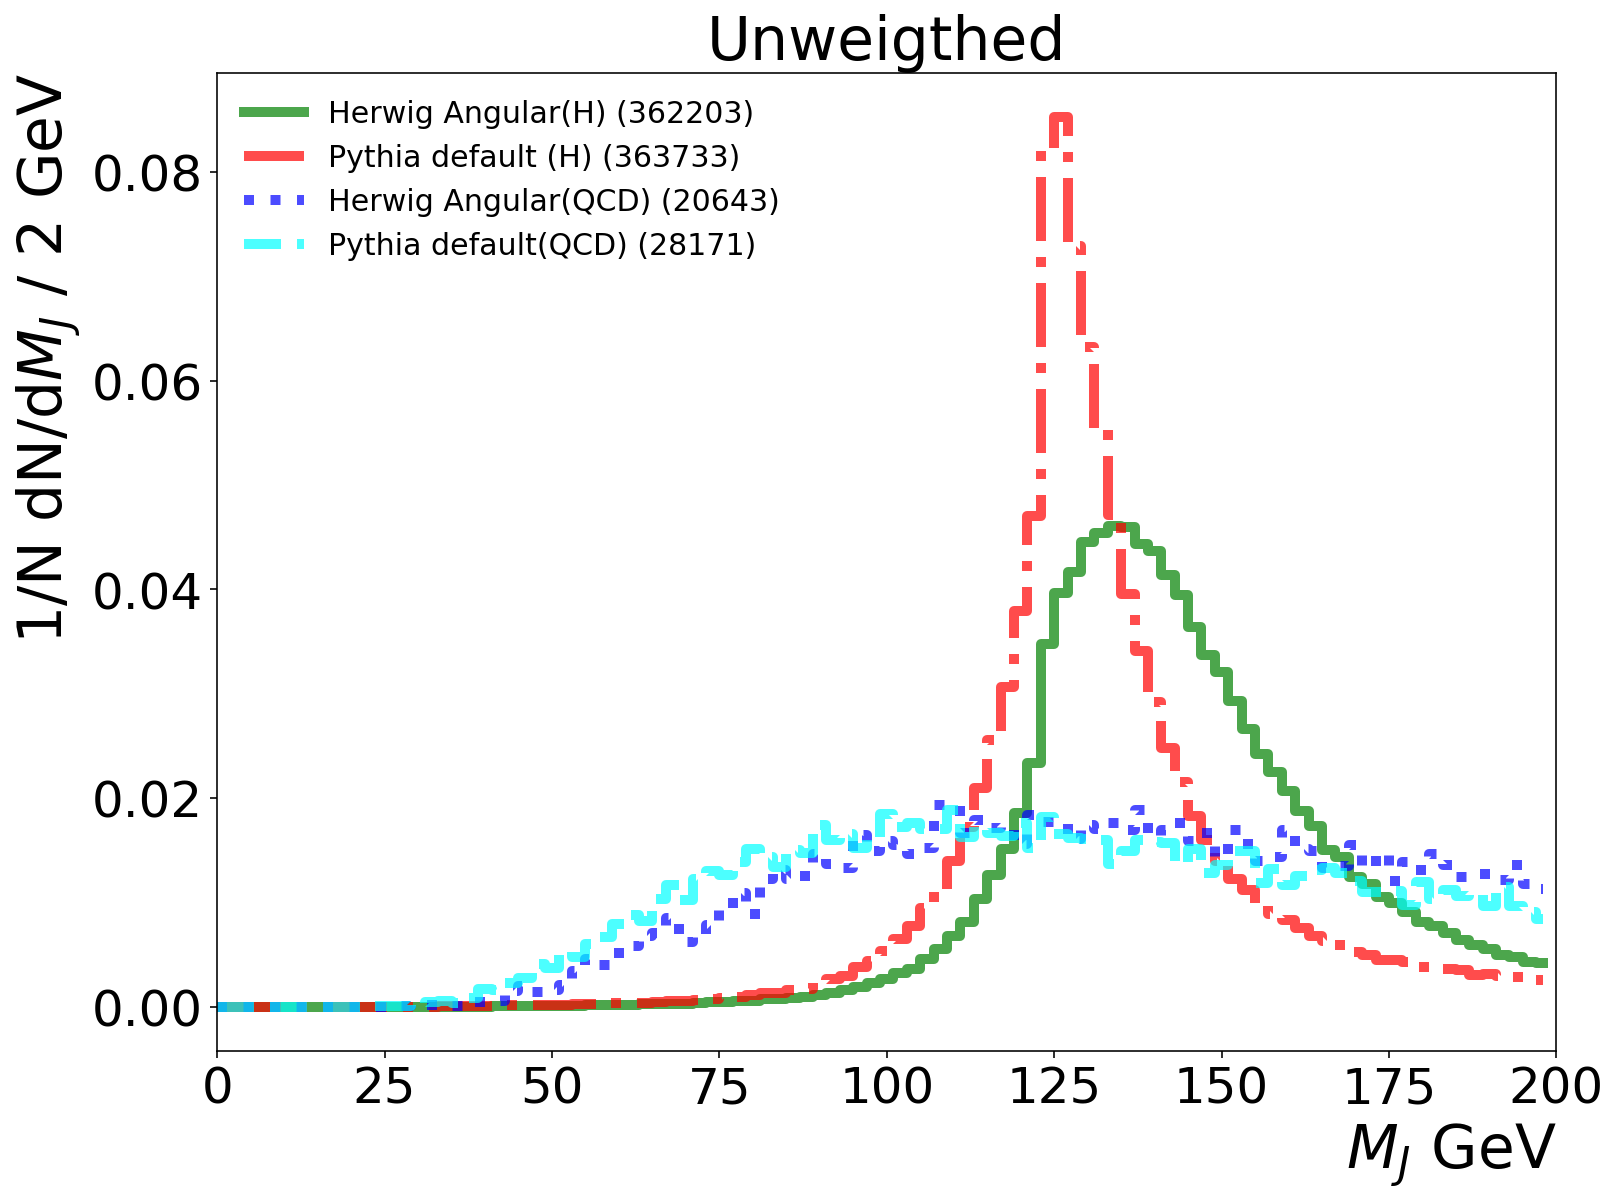

In [146]:
M_j = TotalSamples.H_QCD("MJ_0")


fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, TotalSamples.H_QCD("weight")[i],length, title,colors[i],linestyle[i], is_weighted=False)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Unweigthed", fontsize=30)
# plt.ylim((0.,20))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

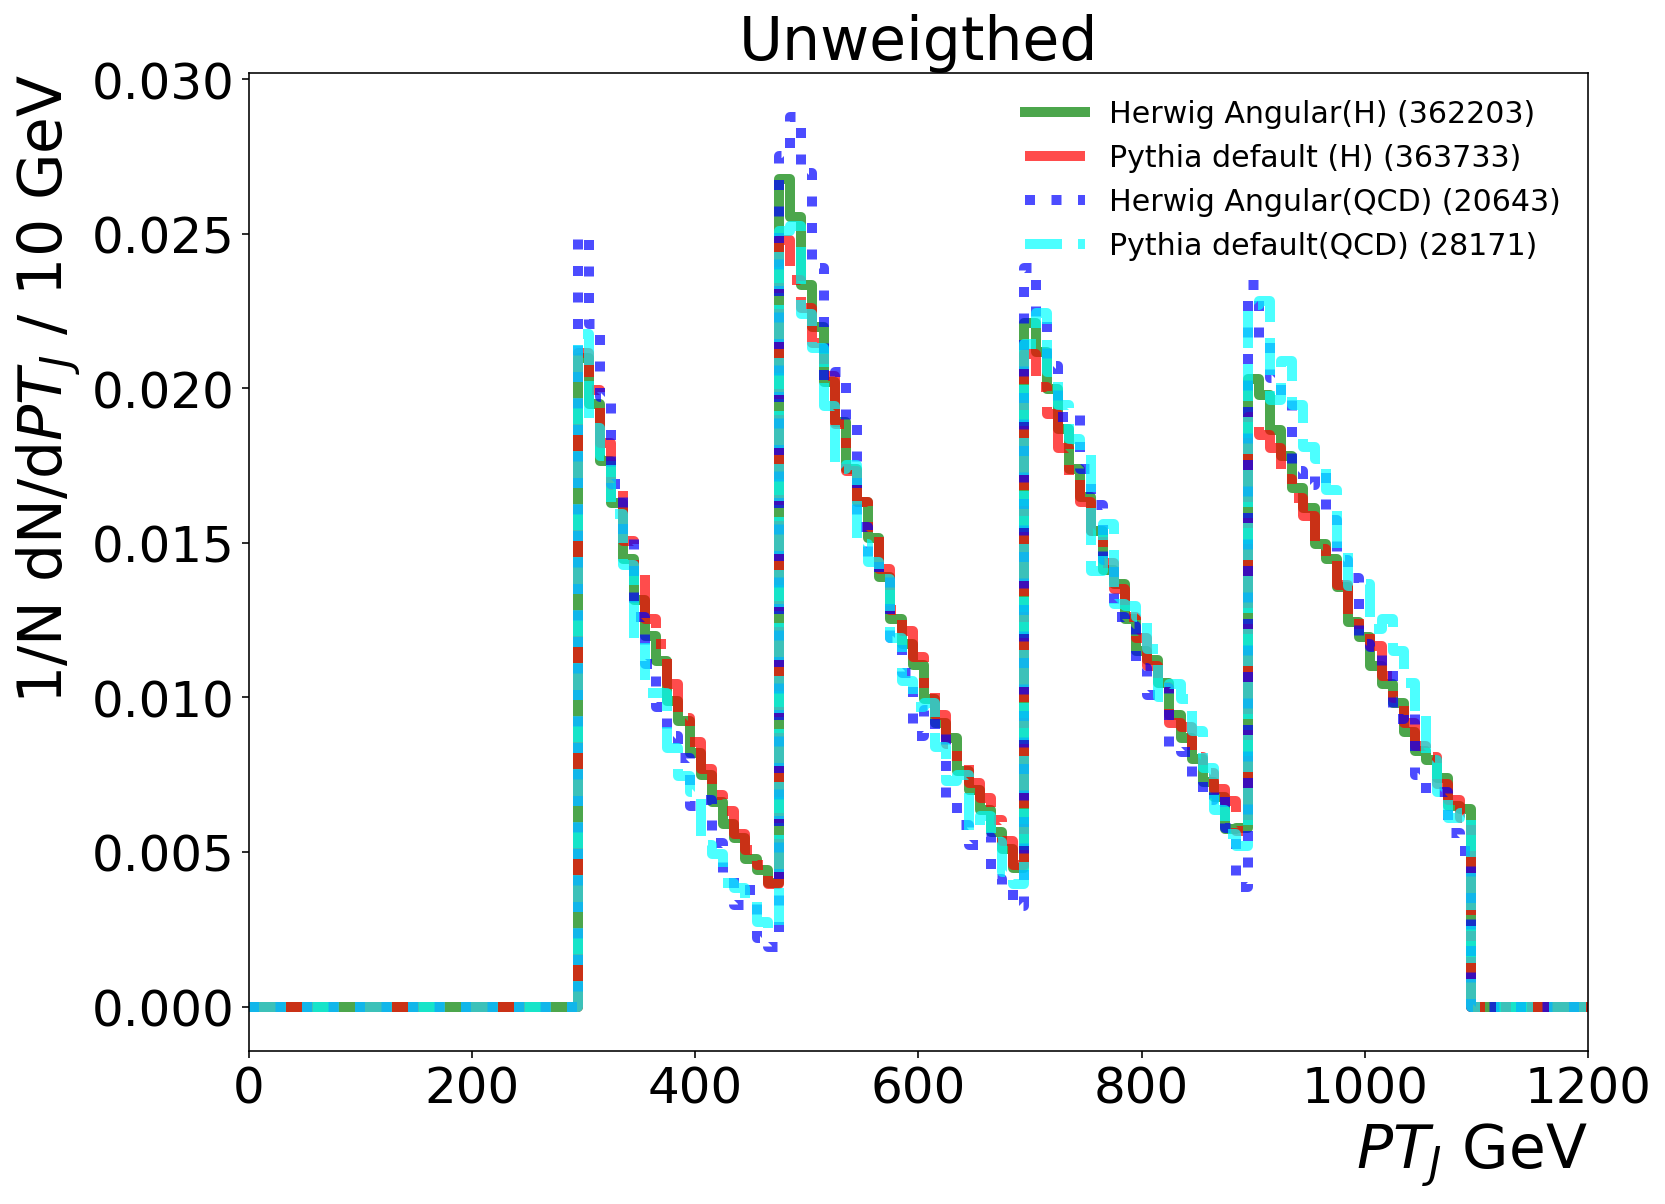

In [147]:
PT_j =  TotalSamples.H_QCD("PTJ_0")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(PT_j):
    length = np.linspace(0,2000,201)
    HIST(process, TotalSamples.H_QCD("weight")[i],length, title,colors[i],linestyle[i], is_weighted=False)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1200))
    plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Unweigthed", fontsize=30)
# plt.ylim((0.,0.050))
plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

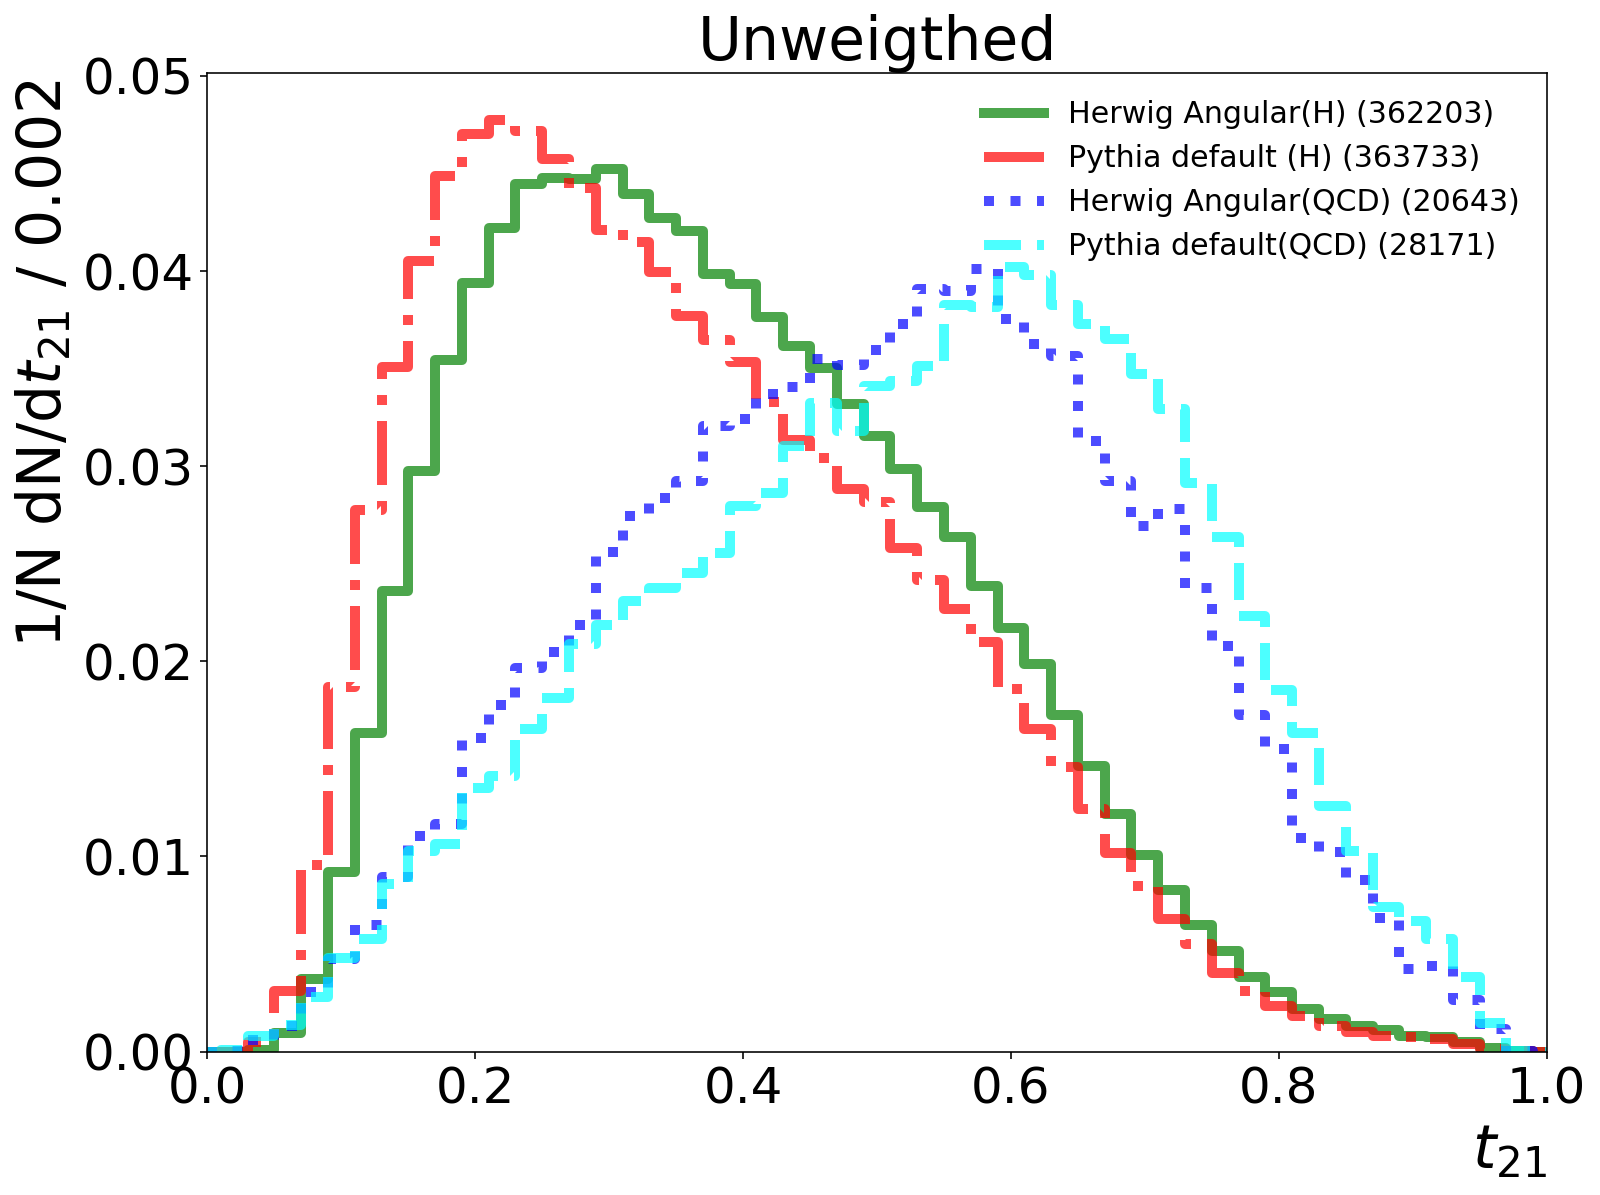

In [148]:
T21 =  TotalSamples.H_QCD("t21_0")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(T21):
    length = np.linspace(0,10,501)
    HIST(process, TotalSamples.H_QCD("weight")[i], length, title,colors[i],linestyle[i], is_weighted=False)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1))
    plt.xlabel("$t_{21}$", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Unweigthed", fontsize=30)
plt.ylim((0.))
plt.ylabel("1/N dN/d$t_{21}$ / 0.002 ", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

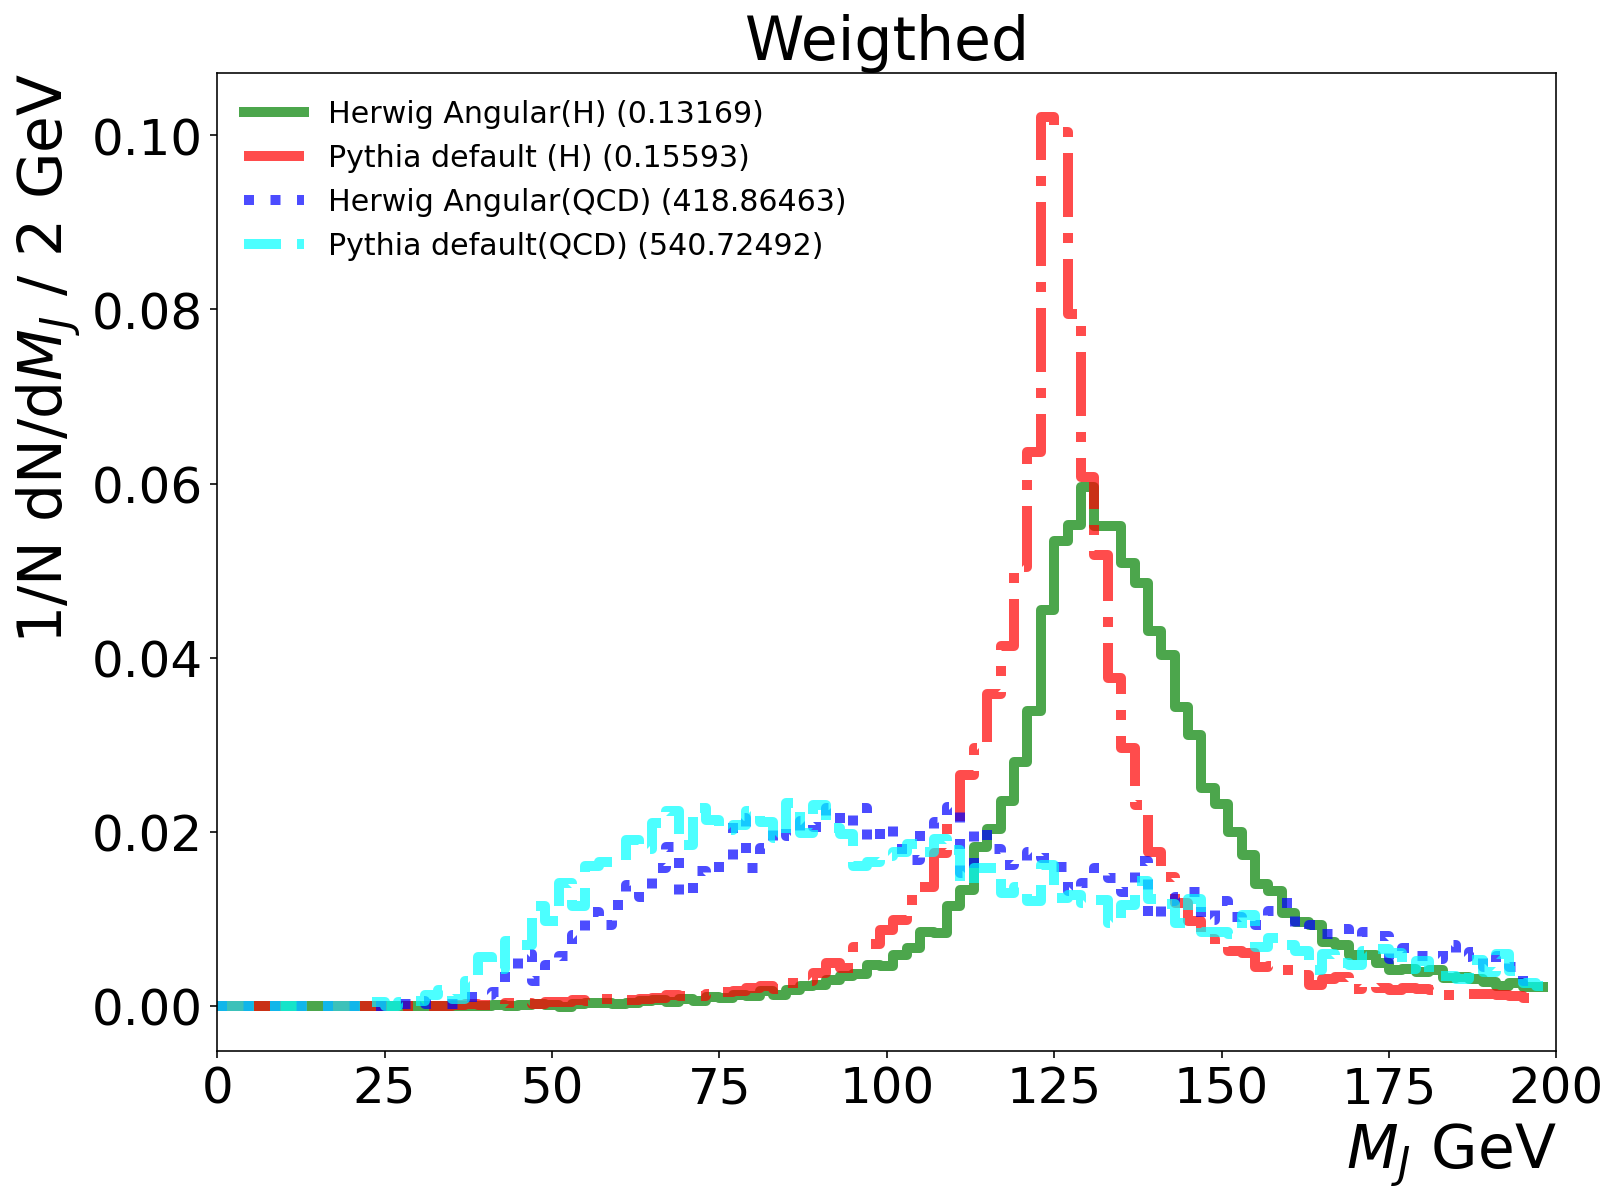

In [154]:
M_j =  TotalSamples.H_QCD("MJ_0")


fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, TotalSamples.H_QCD("weight")[i], length, title,colors[i],linestyle[i], is_weighted=True)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Weigthed", fontsize=30)
# plt.ylim((0.,20))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

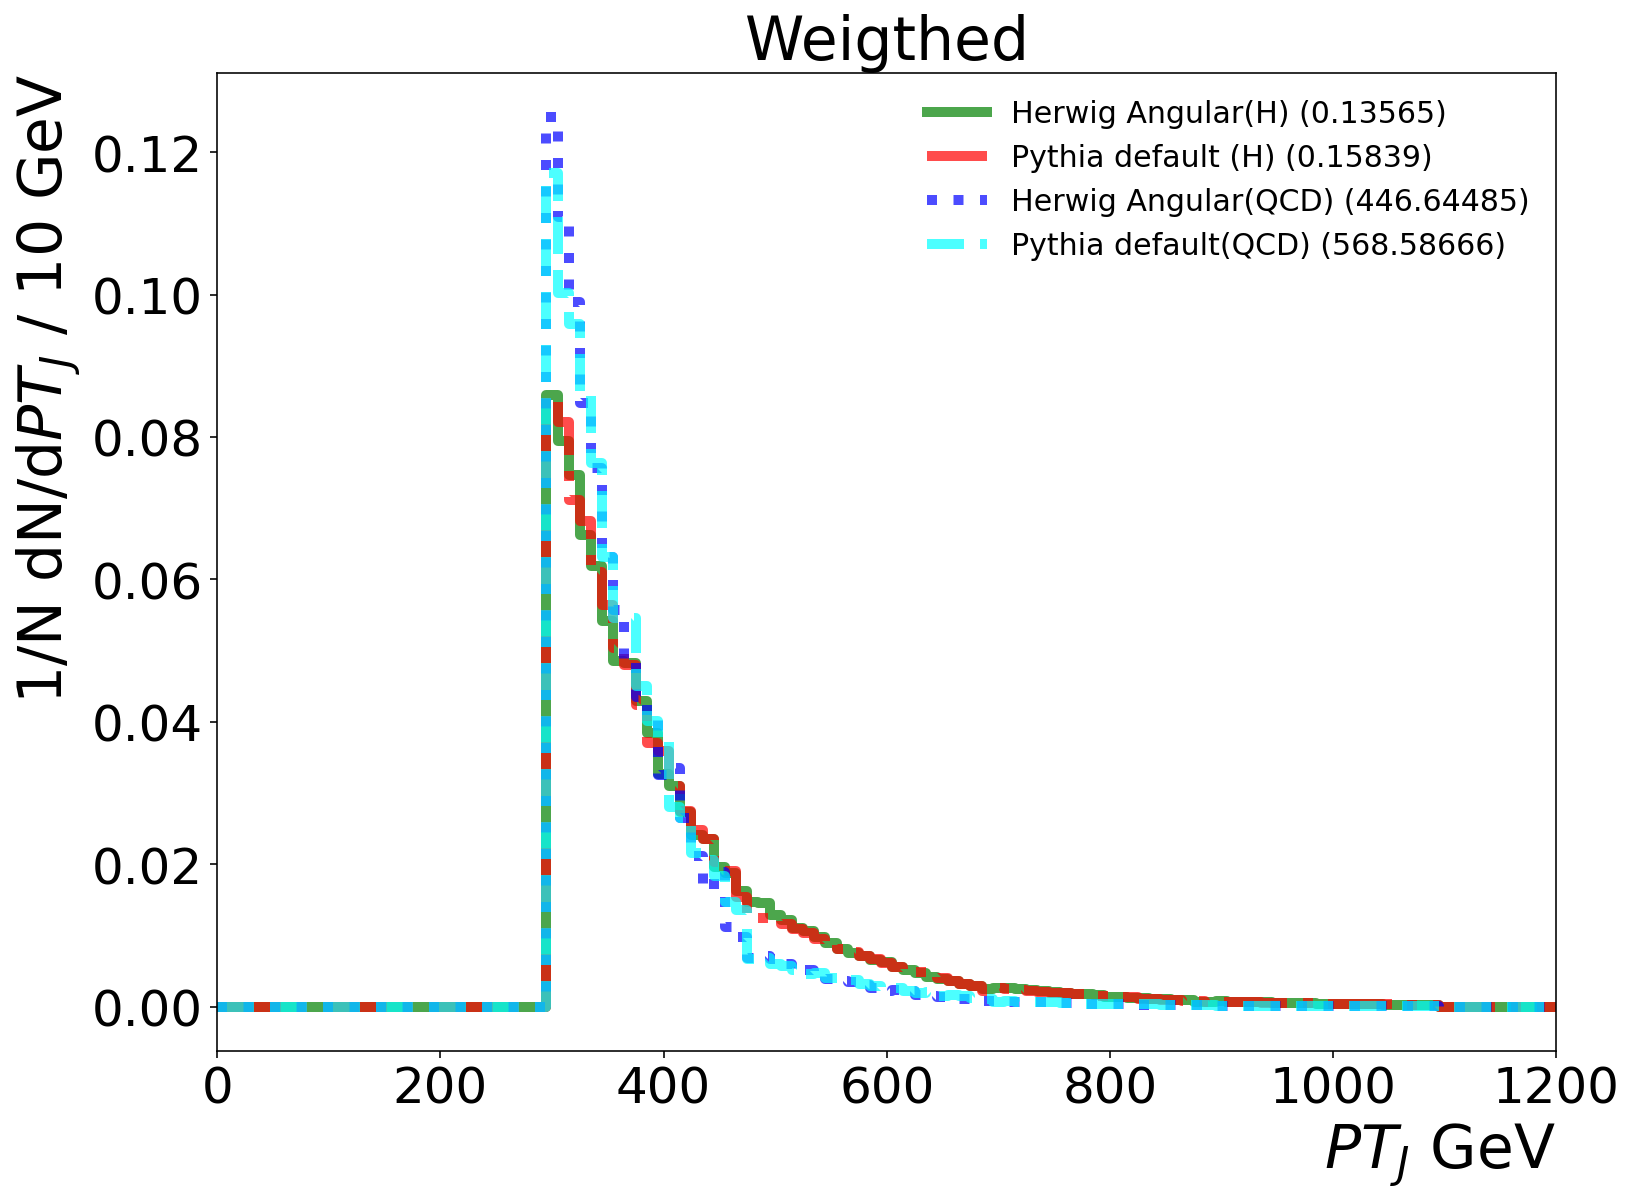

In [150]:
PT_j =  TotalSamples.H_QCD("PTJ_0")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(PT_j):
    length = np.linspace(0,2000,201)
    HIST(process, TotalSamples.H_QCD("weight")[i], length, title,colors[i],linestyle[i], is_weighted=True)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1200))
    plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Weigthed", fontsize=30)
# plt.ylim((0.,50))
plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

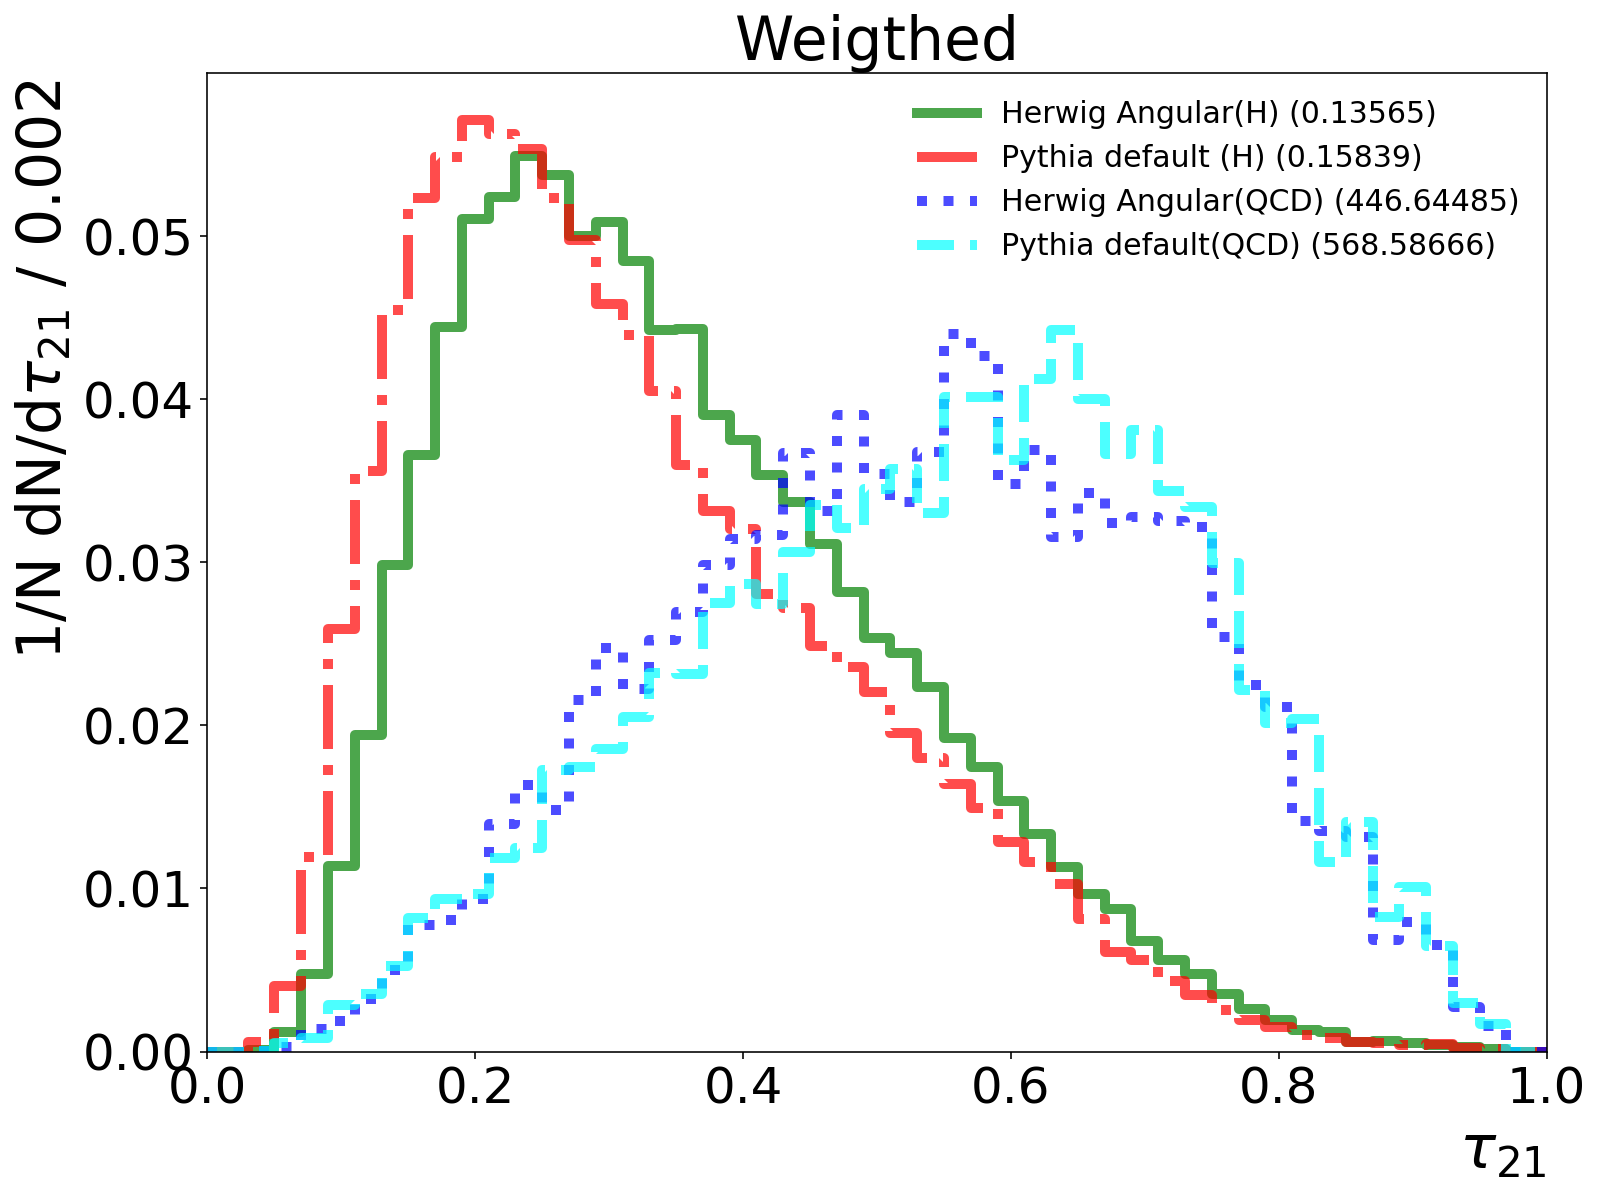

In [152]:
T21 = TotalSamples.H_QCD("t21_0")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(T21):
    length = np.linspace(0,10,501)
    HIST(process, TotalSamples.H_QCD("weight")[i], length, title,colors[i],linestyle[i], is_weighted=True)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1))
    plt.xlabel("$\\tau_{21}$", fontsize=30,horizontalalignment='right',x=1) 

plt.title("Weigthed", fontsize=30)
plt.ylim((0.))
plt.ylabel("1/N dN/d$\\tau_{21}$ / 0.002 ", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  